In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("airquality (1).csv")
df

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,1,41.0,190.0,7.4,67,5,1,High
1,2,36.0,118.0,8.0,72,5,2,High
2,3,12.0,149.0,12.6,74,5,3,Low
3,4,18.0,313.0,11.5,62,5,4,NaN
4,5,NaN,NaN,14.3,56,5,5,High
...,...,...,...,...,...,...,...,...
148,149,30.0,193.0,6.9,70,9,26,Low
149,150,NaN,145.0,13.2,77,9,27,Low
150,151,14.0,191.0,14.3,75,9,28,High
151,152,18.0,131.0,8.0,76,9,29,Medium


In [3]:
df.isnull().sum()

Unnamed: 0     0
Ozone         37
Solar.R        7
Wind           2
Temp           0
Month          0
Day            0
Humidity       8
dtype: int64

In [4]:
df = df.drop(["Unnamed: 0"], axis=1)
df

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.0,190.0,7.4,67,5,1,High
1,36.0,118.0,8.0,72,5,2,High
2,12.0,149.0,12.6,74,5,3,Low
3,18.0,313.0,11.5,62,5,4,NaN
4,NaN,NaN,14.3,56,5,5,High
...,...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26,Low
149,NaN,145.0,13.2,77,9,27,Low
150,14.0,191.0,14.3,75,9,28,High
151,18.0,131.0,8.0,76,9,29,Medium


In [5]:
df["Ozone"]= df["Ozone"].fillna(df["Ozone"].mean())
df["Solar.R"]= df["Solar.R"].fillna(df["Solar.R"].mean())
df['Wind'].fillna(df['Wind'].mean(), inplace=True)
df['Humidity'] = df['Humidity'].fillna(df['Humidity'].mode()[0])
df

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.00000,190.000000,7.4,67,5,1,High
1,36.00000,118.000000,8.0,72,5,2,High
2,12.00000,149.000000,12.6,74,5,3,Low
3,18.00000,313.000000,11.5,62,5,4,High
4,42.12931,185.931507,14.3,56,5,5,High
...,...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70,9,26,Low
149,42.12931,145.000000,13.2,77,9,27,Low
150,14.00000,191.000000,14.3,75,9,28,High
151,18.00000,131.000000,8.0,76,9,29,Medium


In [6]:
df.isnull().sum()

Ozone       0
Solar.R     0
Wind        0
Temp        0
Month       0
Day         0
Humidity    0
dtype: int64

[]

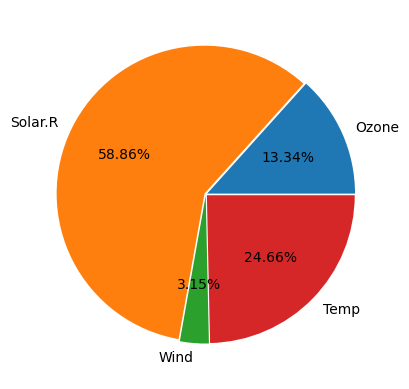

In [7]:
plt.pie([df["Ozone"].mean(), df["Solar.R"].mean(), df["Wind"].mean(), df["Temp"].mean()], autopct="%1.2f%%", explode=[0.01, 0.01, 0.01, 0.01], labels=["Ozone", "Solar.R","Wind", "Temp"])
plt.plot()

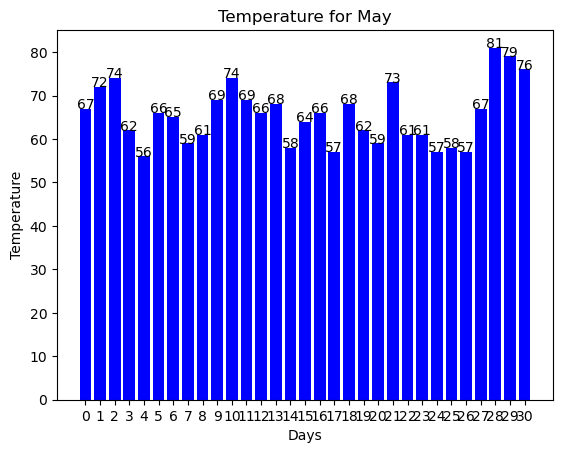

In [8]:
def addLabels():
    for i in range(len(df.iloc[0:31, 3])):
        plt.text(i, df.iloc[0:31, 3][i], df.iloc[0:31, 3][i], ha = "center")
    
y = np.arange(len(df.iloc[0:31, 3]))
addLabels()
plt.bar(x=y, height=df.iloc[0:31, 3], tick_label=y, color="blue")

plt.title("Temperature for May")
plt.xlabel("Days")
plt.ylabel("Temperature")
plt.show()

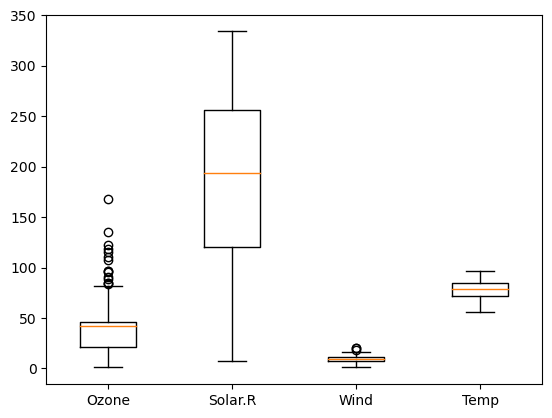

In [9]:
plt.boxplot(x=df[["Ozone", "Solar.R", "Wind", "Temp"]], labels=["Ozone","Solar.R","Wind","Temp"])
plt.show()

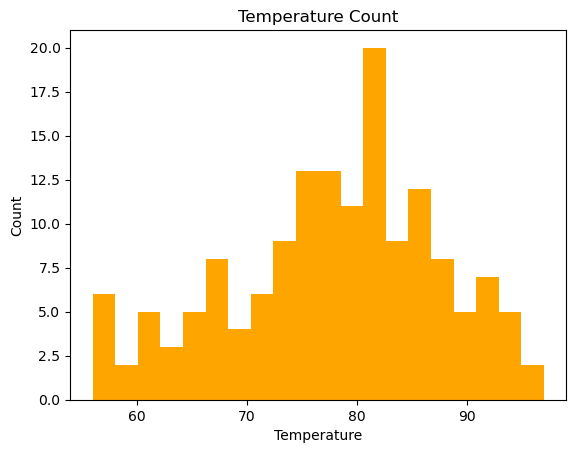

In [10]:
plt.hist(x=df["Temp"], bins=20,color="orange",label="Temp")

plt.title("Temperature Count")
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Temperature')

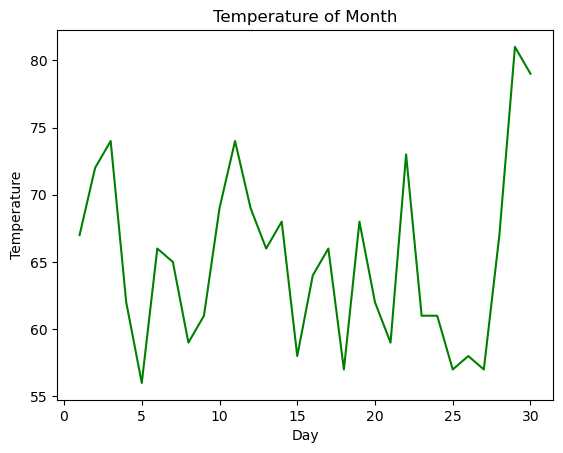

In [11]:
plt.plot(df.iloc[0:30, 5], df.iloc[0:30, 3], color="green")

plt.title("Temperature of Month")
plt.xlabel("Day")
plt.ylabel("Temperature")

Text(0, 0.5, 'Wind')

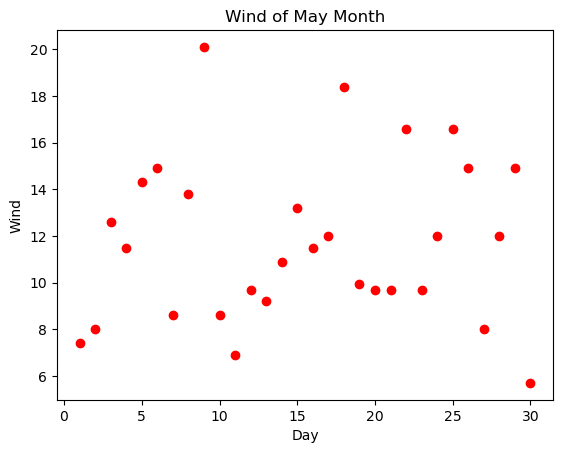

In [12]:
plt.scatter(df.iloc[0:30, 5], df.iloc[0:30, 2], color="red")

plt.title("Wind of May Month")
plt.xlabel("Day")
plt.ylabel("Wind")

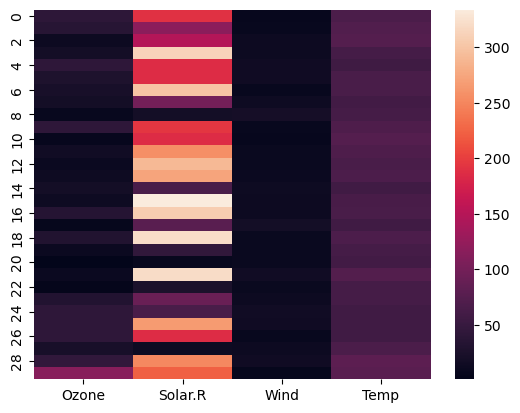

In [13]:
sns.heatmap(data=df.iloc[0:30, [0,1,2,3]])
plt.show()

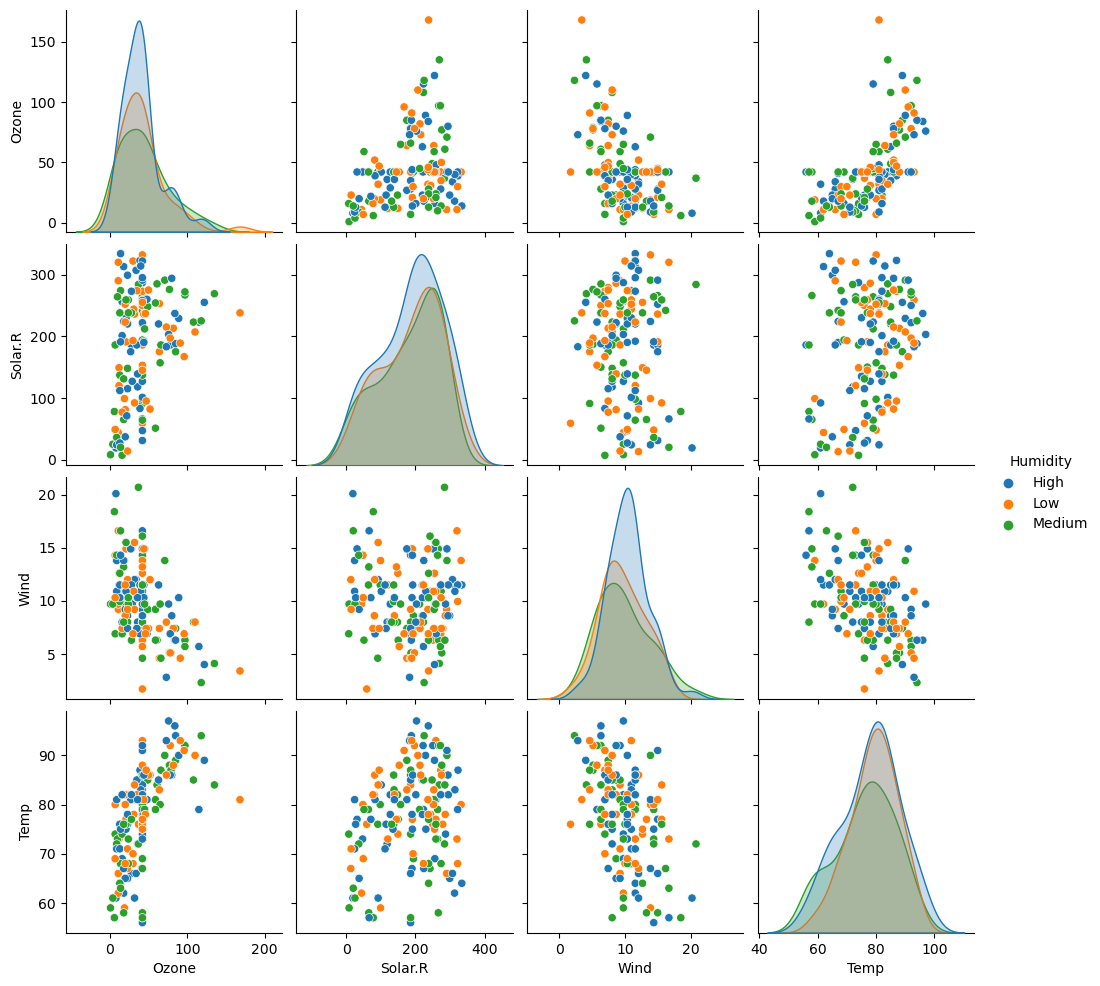

In [14]:
sns.pairplot(df.iloc[:, [0,1,2,3,6]], hue="Humidity")
plt.show()

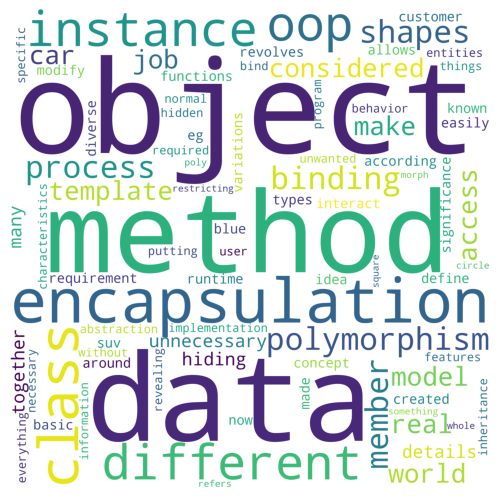

In [15]:
from wordcloud import WordCloud, STOPWORDS

with open("text-Copy1.txt", "r") as file:
    text = file.read()

stopwords= set(STOPWORDS)
wordcloud= WordCloud(width= 2500, height= 2500,
                    background_color= 'white',
                    stopwords= stopwords,
                    min_font_size= 16).generate(text)


plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()